<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
path = r'C:\Users\Nour\Downloads'
house_csv = "\Sacramento_transactions (1).csv"

house = pd.read_csv(path+house_csv)

In [3]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER
target = house[['price']]
target


,price
0,59222
1,68212
2,68880
3,69307
4,81900
...,...
980,232425
981,234000
982,235000
983,235301


price (what we are trying to predict)

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [6]:
# ANSWER
predictors = house.loc[:,['beds', 'baths', 'sq__ft','zip']]
predictors

,beds,baths,sq__ft,zip
0,2,1,836,95838
1,3,1,1167,95823
2,2,1,796,95815
3,2,1,852,95815
4,2,1,797,95824
...,...,...,...,...
980,4,3,2280,95829
981,3,2,1477,95823
982,3,2,1216,95610
983,4,2,1685,95758


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [7]:
# ANSWER
data = predictors
data['price'] = target

data.corr()

,beds,baths,sq__ft,zip,price
beds,1.000000,0.839650,0.684041,0.125319,0.342024
baths,0.839650,1.000000,0.665690,0.069165,0.416208
sq__ft,0.684041,0.665690,1.000000,0.130108,0.333897
zip,0.125319,0.069165,0.130108,1.000000,-0.093353
price,0.342024,0.416208,0.333897,-0.093353,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [8]:
from sklearn.linear_model import LinearRegression as reg

##### 2.4.1 Fit predictor and target variables using linear regression 

In [9]:
# ANSWER

X = data[['sq__ft','baths']]
Y = data['price']
reg = reg()
reg.fit(X,Y)

LinearRegression()

In [10]:
print(f'Intercept:{reg.intercept_}\nSlope: {reg.coef_}\n{reg.score}')

Intercept:116758.58835021191
Slope: [1.65538727e+01 5.38196745e+04]
<bound method RegressorMixin.score of LinearRegression()>


In [11]:
reg.predict(X)

array([184417.30045728, 189896.63231339, 183755.14555019, 184682.16242011,
       183771.69942287, 189151.70804293, 242673.41288376, 190062.17104017,
       239975.13163739, 243368.6755362 , 239445.40771173, 245735.87932902,
       184996.68600098, 187463.21302986, 241315.99532424, 243170.02906407,
       184549.73143869, 183738.59167752, 180311.94003336, 246844.98879838,
       242905.16710124, 246398.0342361 , 244924.73956784, 250900.68760427,
       239312.97673031, 242408.55092092, 186519.64228727, 242921.72097391,
       247242.28174263, 245057.17054926, 241597.41115975, 243467.99877226,
       247242.28174263, 242872.05935588, 241597.41115975, 247871.32890436,
       242309.22768486, 248765.23802893, 243368.6755362 , 183159.20613382,
       245984.18741918, 244378.4617695 , 241878.82699526, 241663.62665046,
       250668.93338679, 189118.60029757, 250553.05627805, 202941.08398294,
       251811.15060151, 248848.00739231, 244063.93818863, 250718.59500482,
       248616.25317483, 2

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [12]:
# ANSWER
reg.score(X, Y)

0.17902920726797467

### 3. Splitting Data

In [13]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [17]:
# ANSWER
## Create training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#X_train, X_test, _train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [19]:
# ANSWER
## Check training/test data
print(f'training feature data{X_train.shape}\ntest feature data {X_test.shape}\ntraining target data{Y_train.shape}\ntest target data {Y_test.shape}')

training feature data(659, 2)
test feature data (326, 2)
training target data(659,)
test target data (326,)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [23]:
# ANSWER
reg.fit(X_train, Y_train)


LinearRegression()

In [22]:
# ANSWER
reg.score(X_test, Y_test)

0.16805880122516081

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [33]:
# ANSWER

reg.predict([[1204,2]])

array([240195.82959119])

#### Find the error

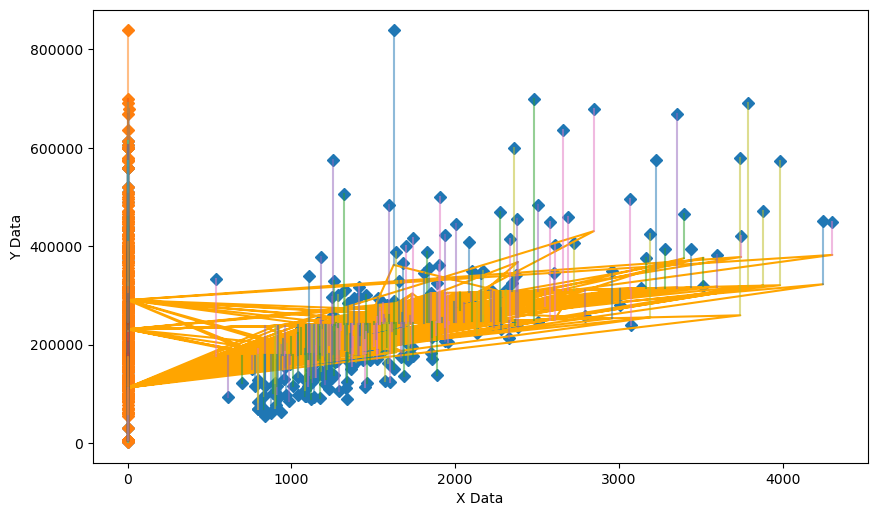

In [34]:
# Predict price from X_test
y_pred = reg.predict(X_test)
def residual_fit_graph(x, y, y_pred, graphWidth=1000, graphHeight=600):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    if isinstance(x, pd.DataFrame):
        x = x.values
    # first the raw data as a scatter plot
    axes.plot(x, y,  'D', alpha = 1)
    # now the model as a line plot
    axes.plot(x, y_pred, color = 'orange')
    # now add individual line for each point
    for X,Y,Y_pred in zip(x, y, y_pred):
        lineXdata = (X, X) # same X
        lineYdata = (Y, Y_pred) # different Y
        plt.plot(lineXdata, lineYdata, alpha = 0.5)
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.show()
    plt.close('all')
residual_fit_graph(X_test, y_test, y_pred)

In [35]:
list(zip(X_test,y_test,y_pred))

[('sq__ft', 77000, 178638.9052364626), ('baths', 236000, 367730.7540573366)]



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



